In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [21]:
listings = pd.read_csv("Data/sp500_listings.csv")
listings.head()

,date,stock
0,1990-01-01,905270
1,1990-01-01,921795
2,1990-01-01,904261
3,1990-01-01,905261
4,1990-01-01,916328


In [22]:
info = pd.read_csv("Data/stock_info.csv")
info

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
0,905270,NaN,NaN,US0318971019,AMP DEAD - MERGER 545615,DEAD
1,921795,NaN,AAMRQ.PK^L13,US0017651060,AMR DEAD - DELIST.09/12/13,DEAD
2,904261,NaN,NaN,US0434131035,ASARCO DEAD - MERGER 18/11/99,DEAD
3,905261,NaN,NaN,US0019575051,AT & T DEAD - DELIST.21/11/05,DEAD
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [23]:
prices = pd.read_csv("Data/stock_prices.csv")
prices.head()

,date,905270,921795,904261,905261,916328,923024,936365,902355,912215,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
0,1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
volumes = pd.read_csv("Data/stock_volumes.csv")
volumes.head()

,date,905270,921795,904261,905261,916328,923024,936365,902355,912215,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
0,1990-01-02,284.8,3153.8,115.1,2845.3,10138.2,8.7,2544.0,121.4,254.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,372.2,3292.9,251.0,2405.2,6133.7,6.7,686.8,119.1,285.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,508.6,3003.3,185.5,3142.3,6496.6,39.2,944.2,69.4,324.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,378.0,3682.9,34.8,2679.9,3393.1,4.0,1511.0,24.6,145.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,356.6,1999.0,18.7,1897.2,6652.1,4.5,477.0,53.9,176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def print_shape(df, dfname):
    print(dfname + " has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns")
    
dfs = [listings, info, prices, volumes]
dfnames = ["Listings", "Info", "Prices", "Volumes"]
for i in range(len(dfs)):
    print_shape(dfs[i], dfnames[i])

Listings has 188872 rows and 2 columns
Info has 1241 rows and 6 columns
Prices has 7914 rows and 1242 columns
Volumes has 7914 rows and 1242 columns


In [26]:
# Changing dates to datetime objects

def convert_datetime(df):
    df["date"] = pd.to_datetime(df["date"])

dfs = [listings, prices, volumes]
for df in dfs:
    convert_datetime(df)

In [27]:
# Converting prices and volumes into a long format

mini_prices = prices.iloc[:,:20]
mini_volumes = volumes.iloc[:,:20]

prices_long = pd.melt(mini_prices, id_vars="date")
volumes_long = pd.melt(mini_volumes, id_vars="date")
prices_long

,date,variable,value
0,1990-01-02,905270,22.75
1,1990-01-03,905270,22.56
2,1990-01-04,905270,22.38
3,1990-01-05,905270,21.81
4,1990-01-08,905270,22.25
...,...,...,...
150361,2021-05-24,905802,84.19
150362,2021-05-25,905802,82.43
150363,2021-05-26,905802,84.00
150364,2021-05-27,905802,85.19


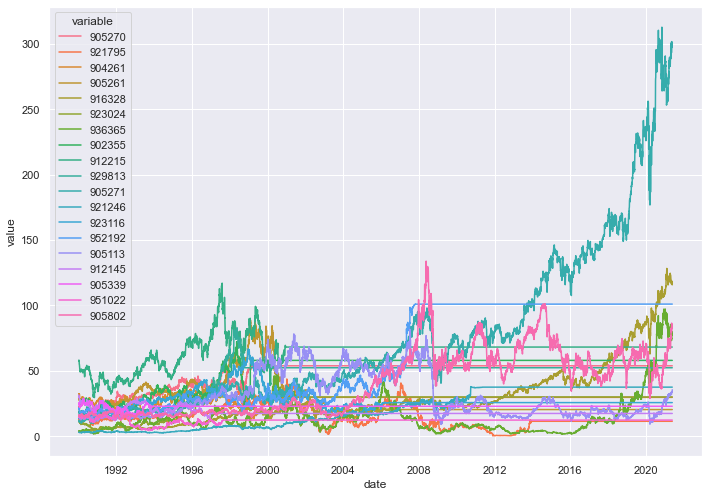

In [28]:
# Line plot of first 20 stock prices

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=prices_long, x="date", y="value", hue="variable")

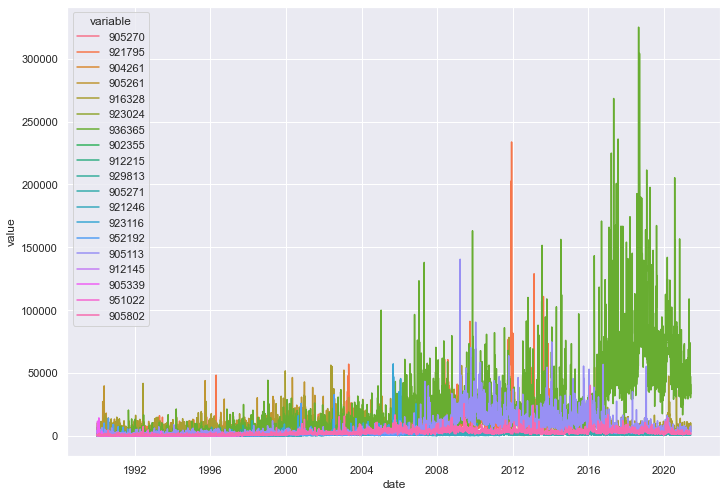

In [29]:
# Line plot of first 20 stock volumes

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=volumes_long, x="date", y="value", hue="variable")

In [30]:
# Looking for missing values

prices.isna().sum()/prices.shape[0] # proportion missing in each column

date      0.000000
905270    0.000000
921795    0.000000
904261    0.000000
905261    0.000000
            ...   
131745    0.140637
69487D    0.656053
68157P    0.640637
9110RA    0.787213
292703    0.334597
Length: 1242, dtype: float64

In [37]:
monthly_prices = prices[prices.date.dt.day == 1]
monthly_prices.head()

,date,905270,921795,904261,905261,916328,923024,936365,902355,912215,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
22,1990-02-01,22.75,11.52,28.13,24.43,3.6499,9.88,3.6250,24.38,49.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,1990-03-01,24.06,12.78,28.50,25.39,3.6079,10.00,4.3750,27.88,51.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,1990-05-01,24.75,13.26,25.13,25.63,3.7827,9.00,4.3750,26.25,47.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,1990-06-01,26.31,13.81,26.63,27.62,4.2512,8.75,5.2500,28.13,53.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,1990-08-01,22.63,11.78,29.00,23.40,4.8106,7.75,3.4375,24.88,49.88,...,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
monthly_prices_long = pd.melt(monthly_prices, id_vars="date")
monthly_prices_long

,date,variable,value
0,1990-02-01,905270,22.7500
1,1990-03-01,905270,24.0600
2,1990-05-01,905270,24.7500
3,1990-06-01,905270,26.3100
4,1990-08-01,905270,22.6300
...,...,...,...
297835,2020-10-01,292703,230.4600
297836,2020-12-01,292703,237.2600
297837,2021-02-01,292703,266.0000
297838,2021-03-01,292703,289.6101


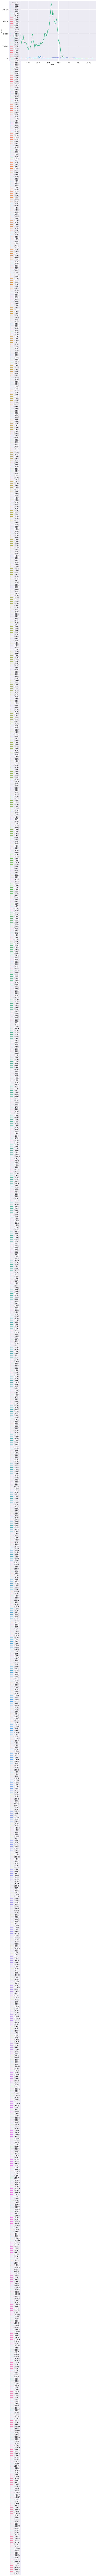

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=monthly_prices_long, x="date", y="value", hue="variable")